In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets, linear_model
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [76]:
clientes = pd.read_csv(r'C:\Users\chuto\Dropbox\DESARROLLADOR\014_Hackaton Brewing 2020\reto-colombia-2020\data\Input1_clientes_estructura.csv', encoding = 'UTF-8', sep =';')
ventas = pd.read_csv(r'C:\Users\chuto\Dropbox\DESARROLLADOR\014_Hackaton Brewing 2020\reto-colombia-2020\data\Input2_clientes_venta.csv', encoding = 'UTF-8', sep =';')
clientes.head()

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
1,2,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
2,3,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
3,4,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,1
4,5,Regional 1,Gerencia_1,Subcanal_1,Categoria_2,1


In [292]:
ventas.shape

(1406116, 12)

In [57]:
ventas['Mes'].unique()

array([ 5,  6,  7,  9,  8, 10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [77]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406116 entries, 0 to 1406115
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Año               1406116 non-null  int64  
 1   Mes               1406116 non-null  int64  
 2   Cliente           1406116 non-null  int64  
 3   SegmentoPrecio2   1406116 non-null  object 
 4   Marca2            1406116 non-null  object 
 5   Cupo2             1406116 non-null  object 
 6   CapacidadEnvase2  1406116 non-null  object 
 7   Volumen           1406116 non-null  float64
 8   disc              1406116 non-null  float64
 9   nr                1406116 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 107.3+ MB


In [78]:
#import datetime
from datetime import date
#ventas['fecha'] = pd.concat([ventas['Año'].map(str)+ ventas['Mes'].map(str)])
#ventas['ano_mes'] = ventas['Año'] + ',' + ventas['Mes']
#df['myDt']=pd.to_datetime(df[['year','month','day']])

ventas['fecha_str'] = pd.concat([str(1) + '-' +ventas['Mes'].map(str) + '-' + ventas['Año'].map(str)])
ventas['fecha'] = [datetime.datetime.strptime(fecha, '%d-%m-%Y') for fecha in ventas['fecha_str']]

ventas.head(10)

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,fecha_str,fecha
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,1-5-2019,2019-05-01
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,1-5-2019,2019-05-01
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,1-5-2019,2019-05-01
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,1-5-2019,2019-05-01
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,1-5-2019,2019-05-01
5,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_10,0.369485,-114.891895,2853.911219,1-5-2019,2019-05-01
6,2019,5,10,SegmentoPrecio_1,Marca_5,Cupo_2,CapacidadEnvase_10,0.825907,-221.071444,6153.614786,1-5-2019,2019-05-01
7,2019,6,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.036630,0.000000,303.759828,1-6-2019,2019-06-01
8,2019,5,10,SegmentoPrecio_2,Marca_6,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,358.300464,1-5-2019,2019-05-01
9,2019,5,10,SegmentoPrecio_2,Marca_6,Cupo_1,CapacidadEnvase_10,0.004347,0.000000,43.469689,1-5-2019,2019-05-01


In [79]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406116 entries, 0 to 1406115
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Año               1406116 non-null  int64         
 1   Mes               1406116 non-null  int64         
 2   Cliente           1406116 non-null  int64         
 3   SegmentoPrecio2   1406116 non-null  object        
 4   Marca2            1406116 non-null  object        
 5   Cupo2             1406116 non-null  object        
 6   CapacidadEnvase2  1406116 non-null  object        
 7   Volumen           1406116 non-null  float64       
 8   disc              1406116 non-null  float64       
 9   nr                1406116 non-null  float64       
 10  fecha_str         1406116 non-null  object        
 11  fecha             1406116 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 128.7+ MB


In [129]:
ventas['fecha'].unique()

array(['2019-05-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-05-01T00:00:00.000000000',
       '2020-06-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-08-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [269]:
#ventas.shape
x = ventas.iloc[:, -5].values
y = ventas.iloc[:, -3].values
x

array([0.11222857, 0.02173441, 0.04346881, ..., 0.0586829 , 0.        ,
       0.01956097])

In [270]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [291]:
X_train = np.reshape(X_train, (-1, 1))
Y_train = np.reshape(Y_train, (-1, 1))
#X_test = X_test.reshape(-1, 1)
#Y_test = Y_test.reshape(-1, 1)

#type(X_train)
Y_train = (Y_train)
X_train = (X_train)
X_train.shape
#a = list(X_train)
#b = list(Y_train)

(1124892, 1)

In [289]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [290]:
regressor.score(X_test, Y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0.01870476 0.01738752 0.76399729 ... 0.01870476 0.02173441 2.58178393].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

TypeError: invalid type promotion

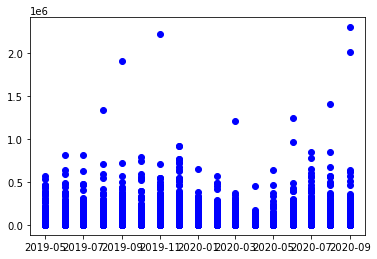

In [135]:
viz_train = plt
viz_train.scatter(X_train, Y_train, color = 'blue')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('Fecha VS Nr')
viz_train.xlabel('Fecha')
viz_train.ylabel('Nr')
viz_train.show()